In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

hatecomm = pd.read_csv("Hate Review_cleaned_v16.csv")
#hatecomm.head()

In [2]:
hatecomm_1 = hatecomm.loc[(hatecomm['repeat check'] == 'No') 
   & (hatecomm['reaffirm'] == 'Yes') 
    & (hatecomm['Accessibility'] == 'Yes') 
    & (hatecomm['Filter dataset'] == 'Yes')]
hatecomm_2 = hatecomm.loc[(hatecomm['repeat check'] == 'No') 
   & (hatecomm['reaffirm'] == 'Yes') 
    & (hatecomm['Accessibility'] == 'Yes') 
    & (hatecomm['Filter dataset'] == 'Yes')
    &(hatecomm['availability of data'] == 'Yes')]
hatecomm_3 = hatecomm.loc[(hatecomm['repeat check'] == 'No') 
   & (hatecomm['reaffirm'] == 'Yes') 
    & (hatecomm['Accessibility'] == 'Yes') 
    & (hatecomm['Filter dataset'] == 'Yes')
    &(hatecomm['availability of data'] == 'Yes')
    &(hatecomm['verification of the way to access'] == 'Yes')]

#Write the filtered data to a new csv file
hatecomm_1.to_csv('HateReview_1.csv') 
hatecomm_2.to_csv('HateReview_2.csv')
hatecomm_3.to_csv('HateReview_3.csv')

dh_1 = pd.read_csv("HateReview_1.csv")
dh_2 = pd.read_csv("HateReview_2.csv")
dh_3 = pd.read_csv("HateReview_3.csv")

In [3]:
#hatecomm_1.info()
#hatecomm_2.info()
#dh_3.info()

In [4]:
#sns.set(style="whitegrid")
#plt.figure(figsize=(10,8))
#ax = sns.boxplot(y='citations', data=dh_3, orient="v")

In [5]:
average = dh_3['citations'].mean()
print(average)

med = dh_3['citations'].median()
print(med)

71.13496932515338
17.0


/Users/zehuiyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citations'>

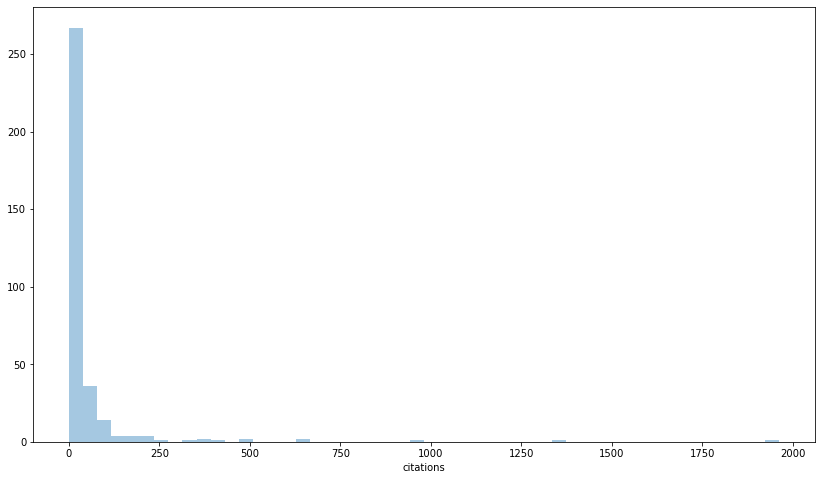

In [6]:
filter_data = dh_1.dropna(subset=['citations'])
plt.figure(figsize=(14,8))
sns.distplot(filter_data['citations'], kde=False)

In [7]:
dh_1['Researcher location'].value_counts() 

Researcher location
USA             61
India           30
UK              14
Italy           13
Bangladesh      10
                ..
Peru             1
Ethiopia         1
USA, Ireland     1
USA, India       1
USA, Qatar       1
Name: count, Length: 126, dtype: int64

In [612]:
#Number of countries Involved in the research
hacom_1['rl'] = hacom_1['Researcher location'].str.count(",") + 1
hacom_1['rl'].mean()

1.313782991202346

In [613]:
hacom_1['rl'].value_counts()

rl
1    256
2     68
3     12
4      5
Name: count, dtype: int64

In [614]:
rlcount = hacom_1['Researcher location'].str.split(', ').explode().value_counts()
rlcount[:20] 

Researcher location
USA             94
India           46
UK              39
Germany         18
Italy           16
France          13
Saudi Arabia    12
Spain           12
Qatar           12
Bangladesh      12
Indonesia       11
Canada          11
Ireland         10
Russia          10
Pakistan         9
China            8
Turkey           7
Greece           7
Mexico           7
South Korea      6
Name: count, dtype: int64

In [615]:
rlcount.size

59

In [616]:
hacom_1.groupby(['Researcher location', 'Number of new datasets']).size()[10:20]

Researcher location  Number of new datasets
Brazil, UK           1                         1
Brazil, USA          2                         1
Bulgaria, Qatar      1                         1
Canada               1                         3
                     10                        1
Canada, Brazil       1                         1
Canada, USA          1                         1
Chile                1                         1
Chile, Spain         2                         1
China                1                         3
dtype: int64

In [617]:
hacom_1['Language'].value_counts()[:20] 

Language
English             174
Arabic               25
Hindi-English        14
Bengali              14
Indonesian           10
Russian               9
Spanish               9
Urdu                  8
French                6
Chinese               5
Portuguese            4
German                4
Italian               4
Turkish               4
Korean                3
English, Russian      2
Kazakh                2
English, Hindi        2
Vietnamese            2
Tunisian              2
Name: count, dtype: int64

In [618]:
#Number of language in the dataset
hacom_1['la'] = hacom_1['Language'].str.count(", ") + 1
hacom_1['la'].mean()

1.1583577712609971

In [619]:
hacom_1['la'].value_counts()

la
1     315
2      15
3       5
5       3
6       1
10      1
4       1
Name: count, dtype: int64

In [620]:
hacom_1.groupby(['la', 'Number of new datasets']).size()

la  Number of new datasets
1   1                         246
    2                          40
    3                          14
    4                           9
    5                           3
    6                           1
    8                           1
    10                          1
2   1                           9
    2                           3
    3                           2
    4                           1
3   1                           4
    2                           1
4   2                           1
5   1                           1
    4                           1
    5                           1
6   5                           1
10  1                           1
dtype: int64

In [621]:
#Extract language 
language_count = hacom_1['Language'].str.split(', ').explode().value_counts()
language_count[:20] 

Language
English            197
Arabic              28
Bengali             15
Hindi-English       14
Spanish             13
French              12
Russian             12
Indonesian          11
Urdu                10
German               8
Italian              7
Portuguese           6
Chinese              6
Turkish              5
Hindi                4
Dutch                4
Kannada-English      3
Korean               3
Greek                3
Vietnamese           2
Name: count, dtype: int64

In [18]:
language_count.count()

49

In [622]:
tf=hacom_1['topical focus'].str.lower()
tf.value_counts()[:15]

topical focus
hate speech                   77
cyberbullying                 34
abusiveness                   25
offensiveness                 23
toxicity                      21
sexism                         7
misogyny                       5
racism                         5
aggressiveness                 4
harassment                     3
offensiveness, hate speech     3
trolling                       3
hate speech, offensiveness     3
political trolling             2
abusive language               2
Name: count, dtype: int64

In [623]:
#Extract topic 
topic_count = tf.str.split(', ').explode().value_counts()
topic_count[:10]

topical focus
hate speech       97
cyberbullying     40
abusiveness       40
offensiveness     39
toxicity          27
sexism            10
misogyny           7
racism             7
aggressiveness     7
extremism          5
Name: count, dtype: int64

In [624]:
(tf.str.count(", ") + 1).value_counts()

topical focus
1    278
2     52
3      8
9      1
5      1
4      1
Name: count, dtype: int64

In [625]:
hacom_1['Data source'].value_counts()[:10]

Data source
Twitter              138
YouTube               23
Reddit                15
Facebook              15
Twitter, Facebook      6
Wikipedia              6
Facebook, YouTube      4
Facebook, Twitter      4
Gab                    3
Vkontakte              3
Name: count, dtype: int64

In [626]:
#Extract source 
source_count = hacom_1['Data source'].str.split(', ').explode().value_counts()
source_count[:10] 

Data source
Twitter       186
YouTube        42
Facebook       42
Reddit         29
Wikipedia      17
Instagram      12
Gab             9
Stormfront      5
BBC             3
WhatsApp        3
Name: count, dtype: int64

In [627]:
(hacom_1['Data source'].str.count(", ") + 1).value_counts()

Data source
1.0     250
2.0      48
3.0      20
4.0      13
6.0       4
5.0       3
17.0      1
13.0      1
Name: count, dtype: int64

In [628]:
hacom_1['Number of new datasets'].value_counts()

Number of new datasets
1     261
2      45
3      16
4      11
5       5
6       1
10      1
8       1
Name: count, dtype: int64

In [26]:
sum(dh_1['Number of new datasets'].value_counts())

341

In [27]:
sum(dh_1['Number of new datasets'].value_counts())

341

In [28]:
# Multi-column frequency count
dh_1.groupby(['Researcher location', 'Language']).size()

Researcher location         Language  
Australia                   English        2
Australia, China, Pakistan  English        1
Bangladesh                  Bengali       10
Bangladesh, Australia       Bengali        1
                            English        1
                                          ..
USA, Nepal                  Nepali         1
USA, Qatar                  English        1
USA, UK                     Marathi        1
United Arab Emirates        Arabic         1
Vietnam                     Vietnamese     2
Length: 174, dtype: int64

In [29]:
#Get the publication year to a new column
dh_1['year'] = dh_1['reference'].str.extract('(\d+)')
dh_1.groupby(['year','citations']).size()

year  citations
2012  658.0        1
2013  47.0         1
      168.0        1
2014  33.0         1
      39.0         1
                  ..
2022  5.0          2
      6.0          1
      8.0          1
      18.0         1
      27.0         1
Length: 187, dtype: int64

In [30]:
dh_1['year'].value_counts()

year
2021    108
2020     95
2019     44
2018     36
2022     27
2017     16
2016      8
2014      2
2015      2
2013      2
2012      1
Name: count, dtype: int64

In [31]:
dh_1.groupby(['year','Number of new datasets']).size()

year  Number of new datasets
2012  2.0                        1
2013  1.0                        2
2014  1.0                        1
      2.0                        1
2015  1.0                        1
      2.0                        1
2016  1.0                        5
      2.0                        1
      3.0                        2
2017  1.0                       10
      2.0                        2
      3.0                        2
      4.0                        2
2018  1.0                       27
      2.0                        6
      3.0                        3
2019  1.0                       36
      2.0                        3
      3.0                        3
      4.0                        1
      10.0                       1
2020  1.0                       79
      2.0                        6
      3.0                        3
      4.0                        4
      5.0                        3
2021  1.0                       79
      2.0                 

In [32]:
dh_1.groupby(['year','rl']).size()

year  rl
2012  1      1
2013  1      2
2014  1      2
2015  1      1
      2      1
2016  1      7
      2      1
2017  1     10
      2      5
      4      1
2018  1     29
      2      5
      3      1
      4      1
2019  1     35
      2      7
      3      2
2020  1     71
      2     20
      3      3
      4      1
2021  1     79
      2     22
      3      5
      4      2
2022  1     19
      2      7
      3      1
dtype: int64

In [33]:
dh_4 = dh_1.loc[(dh_1['year'] >= '2017')]
dh_4.groupby(['Number of new datasets','rl']).size() #115multi country=64+24+9+8+10=115

Number of new datasets  rl
1.0                     1     188
                        2      52
                        3       9
                        4       3
2.0                     1      29
                        2      10
                        3       1
                        4       1
3.0                     1      11
                        2       2
                        3       1
4.0                     1       9
                        2       1
                        4       1
5.0                     1       3
                        2       1
                        3       1
6.0                     1       1
8.0                     1       1
10.0                    1       1
dtype: int64

In [34]:
dh_4['Researcher location'].size

326

In [35]:
dh_4['Language'].str.split(', ').explode().value_counts() #326-183=143

Language
English              183
Arabic                28
Bengali               15
Hindi-English         14
Spanish               13
French                12
Russian               12
Indonesian            11
Urdu                  10
German                 8
Italian                7
Portuguese             6
Chinese                6
Turkish                5
Hindi                  4
Kannada-English        3
Korean                 3
Dutch                  3
Greek                  3
Vietnamese             2
Tunisian               2
Kazakh                 2
Tamil-English          2
Serbian                1
Polish                 1
Pashto                 1
Maltese                1
Sesotho-English        1
IsiZulu-English        1
Xhosa                  1
Persian                1
Afrikaans-English      1
Finnish                1
Amharic                1
Maltenglish            1
Sinhala                1
Japanese               1
Odia                   1
Marathi                1
Bulgarian       

In [36]:
dh_4['Researcher location'].str.split(', ').explode().value_counts()#326-85-45-38-17-16=326-201=125

Researcher location
USA                     85
India                   45
UK                      38
Germany                 17
Italy                   16
France                  13
Saudi Arabia            12
Spain                   12
Qatar                   12
Bangladesh              12
Indonesia               11
Canada                  11
Russia                  10
Ireland                  9
Pakistan                 9
China                    7
Turkey                   7
Greece                   7
Australia                6
South Korea              6
Mexico                   6
Finland                  5
Brazil                   5
Netherlands              4
Jordan                   3
Malaysia                 3
Hong Kong SAR            3
Belgium                  3
Egypt                    3
Sweden                   3
Denmark                  3
Tunisia                  3
Ecuador                  2
Ethiopia                 2
Vietnam                  2
Bulgaria                 2
Chile   

In [37]:
dh_4.groupby(['Researcher location','Number of new datasets']).size()

Researcher location         Number of new datasets
Australia                   1.0                       2
Australia, China, Pakistan  1.0                       1
Bangladesh                  1.0                       8
                            3.0                       2
Bangladesh, Australia       1.0                       2
                                                     ..
USA, Nepal                  1.0                       1
USA, Qatar                  1.0                       1
USA, UK                     1.0                       1
United Arab Emirates        2.0                       1
Vietnam                     1.0                       2
Length: 157, dtype: int64

In [38]:
dh_5 = dh_1.loc[(dh_1['year'] < '2017')]
dh_5.groupby(['rl','Number of new datasets']).size() #multi country


rl  Number of new datasets
1   1.0                       8
    2.0                       4
    3.0                       1
2   1.0                       1
    3.0                       1
dtype: int64

In [39]:
dh_5.groupby(['Researcher location','Number of new datasets']).size() #multi country

Researcher location  Number of new datasets
Belgium              3.0                       1
China                2.0                       1
Denmark              1.0                       1
Germany, Ireland     1.0                       1
Mexico               2.0                       1
UK                   2.0                       1
USA                  1.0                       7
                     2.0                       1
USA, India           3.0                       1
dtype: int64

In [40]:
dh_5['Researcher location'].size

15

In [41]:
dh_5['Researcher location'].str.split(', ').explode().value_counts()

Researcher location
USA        9
UK         1
Mexico     1
India      1
China      1
Germany    1
Ireland    1
Belgium    1
Denmark    1
Name: count, dtype: int64

In [42]:
sum(dh_5['Number of new datasets'])

23.0

In [43]:
sum(dh_4['Number of new datasets'])

469.0

/Users/zehuiyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year'>

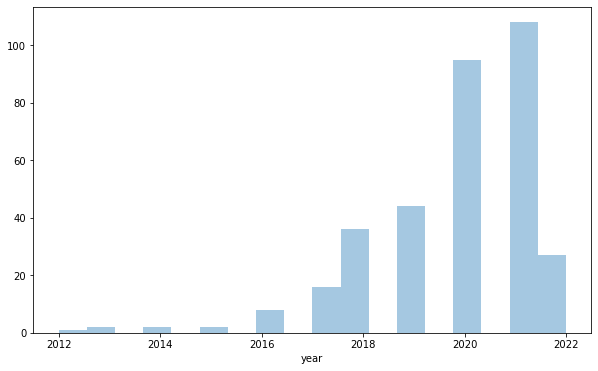

In [44]:
filter_data = dh_1.dropna(subset=['year'])
plt.figure(figsize=(10,6))
sns.distplot(filter_data['year'], kde=False)

/Users/zehuiyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citations'>

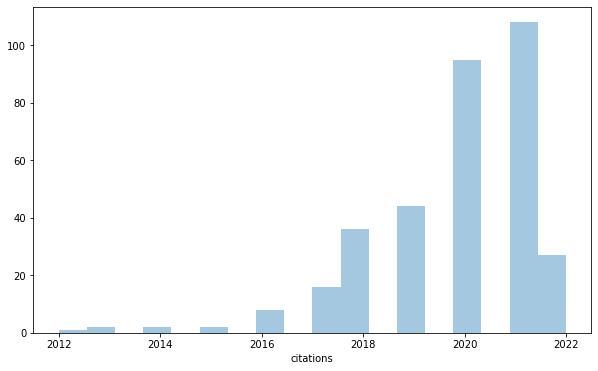

In [45]:
filter_data = dh_1.dropna(subset=['citations'])
plt.figure(figsize=(10,6))
sns.distplot(filter_data['citations'], x=dh_1['year'], kde=False)

In [46]:
hacom = pd.read_csv("HateReview_1_target_cols.csv")

hacom_1 = hacom.loc[(hacom['repeat check'] == 'No') 
   & (hacom['reaffirm'] == 'Yes') 
    & (hacom['Accessibility'] == 'Yes') 
    & (hacom['Filter dataset'] == 'Yes')]

#Write the filtered data to a new csv file
hacom_1.to_csv('HacomReview_1.csv') 
hatefulco_1 = pd.read_csv("HacomReview_1.csv")

In [47]:
union=hacom_1['Conceptualization or Reported'].str.lower()
union.str.split(', ').explode().value_counts()

Conceptualization or Reported
race                        131
gender                      124
religion                    110
sexuality                    78
other                        74
political                    64
nationality                  55
disability                   29
body                         23
class                        13
age                          11
organization/institution      9
other                         2
nationality                   1
political                     1
Name: count, dtype: int64

In [48]:
hacom_1['year'] = hatefulco_1['reference'].str.extract('(\d+)')

In [49]:
hacom_1['year'].value_counts()

year
2021    108
2020     95
2019     44
2018     36
2022     27
2017     16
2016      8
2014      2
2015      2
2013      2
2012      1
Name: count, dtype: int64

In [50]:
#Define a function for recoding
def code(target):
    if target >= 1:
        return "Targeted"
    else:
        return "Non-Targeted"

hacom_1['code'] = hacom_1['# Any Targets'].apply(code)
hacom_1['code'].head()

0        Targeted
1        Targeted
2        Targeted
3    Non-Targeted
4    Non-Targeted
Name: code, dtype: object

In [51]:
#hacom_1['year'].count()#!='2022'

hacom_1[hacom_1['year'] != '2022']

,Unnamed: 0,id,repeat check,reference,Title of the paper,Journal,Researcher location,Summary of the Paper,reaffirm,citations,...,Publication Year,Publication period,Targeted (conceptual),Targeted (reported),# Languages,# Reported Targets,# Conceptual Targets,# Any Targets,year,code
0,0,1,No,"(Aldera et al., 2021)",Exploratory Data Analysis and Classification o...,IEEE Access,Saudi Arabia,"In this paper, the authors present a dataset c...",Yes,1,...,2021,2021,no,yes,1,3,0,3,2021,Targeted
1,1,2,No,"(Relia et al., 2019)","Race, Ethnicity and National Origin-Based Disc...",In Proceedings of the International AAAI Conf...,USA,The paper studies malicious online content of ...,Yes,47,...,2019,2019,yes,yes,1,2,2,2,2019,Targeted
2,2,4,No,"(Nangia et al., 2020)",CrowS-Pairs: A Challenge Dataset for Measuring...,arXiv preprint,USA,To measure some forms of social bias in langua...,Yes,98,...,2020,2020,yes,yes,1,9,9,9,2020,Targeted
3,4,5,No,"(Iqbal, Chun and Keshtkar, 2020)",Using Computational Linguistics to Extract Sem...,2020 IEEE 14th International Conference on Sem...,USA,The goal of this study is to use state-of-the-...,Yes,1,...,2020,2020,no,no,1,0,0,0,2020,Non-Targeted
4,17,6,No,"(Weld et al., 2021)",CONDA: a CONtextual Dual-Annotated dataset fo...,ACL-IJCNLP 2021,Australia,The paper presents a new dataset for in-game t...,Yes,4,...,2021,2021,no,no,1,0,0,0,2021,Non-Targeted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,497,498,No,"(Qian, ElSherief, Belding, & Wang, 2019)",Learning to Decipher Hate Symbols,arXiv preprint,USA,"In this paper, they propose a novel task of de...",Yes,9,...,2019,2019,no,no,1,0,0,0,2019,Non-Targeted
337,498,499,No,"(Mathur, Shah, Sawhney, & Mahata, 2018)",Detecting Offensive Tweets in Hindi-English Co...,Proceedings of the Sixth International Worksho...,"India, USA",The paper focuses on the classification of off...,Yes,114,...,2018,2018,no,no,1,0,0,0,2018,Non-Targeted
338,499,500,No,"(Park, et al., 2021)",Detecting community sensitive norm violations ...,arXiv preprint,USA,They introduce a new dataset focusing on a mor...,Yes,2,...,2021,2021,no,no,1,0,0,0,2021,Non-Targeted
339,501,502,No,"(Waseem & Hovy, 2016)",Hateful symbols or hateful people? predictive ...,Proceedings of the NAACL student research work...,Denmark,They provide a list of criteria founded in cri...,Yes,1371,...,2016,2016,yes,yes,1,2,4,4,2016,Targeted


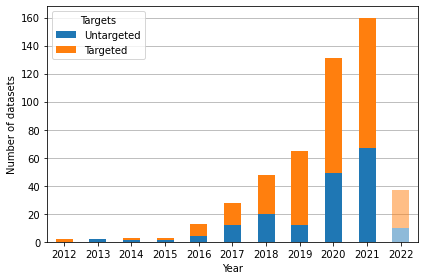

In [819]:
#with vs without target
#colors = ["#14517C","#E7EFFA","#2F7FC1"]
#colors=["#2878B5","#999999","#9AC9DB"]


#p = hacom_1.pivot_table(index=hacom_1[hacom_1['year'] != '2022']['year'], columns='code',values='Number of new datasets', aggfunc='sum')
p = hacom_1.pivot_table(index=hacom_1['year'], columns='code',values='Number of new datasets', aggfunc='sum')
bap=p.plot(kind='bar', stacked=True, color = sns.color_palette())
bap.legend(["Untargeted","Targeted"], title="Targets") 

plt.xlabel('Year')
#plt.xlabel('') 
bap.get_children()[10].set_alpha(0.5)
bap.get_children()[21].set_alpha(0.5)

plt.xticks(rotation=0, ha='center')
#plt.yscale('log')
plt.ylabel('Number of datasets')
#plt.show()
#p.plot(kind='bar', stacked=True, figsize=(10,3), color = sns.color_palette()).legend(["Non-targeted","Both","Targeted"])

bap.grid(axis='y')
bap.set(axisbelow=True)
plt.tight_layout()
plt.savefig("pubyear_targets.pdf", dpi = 400)



In [53]:
dh_1['General or specific'].value_counts()

General or specific
General     184
Specific    157
Name: count, dtype: int64

In [54]:
dh_1['Targeted or non-targeted'].value_counts()

Targeted or non-targeted
Non-targeted    173
Targeted        168
Name: count, dtype: int64

In [55]:
#Re-annotate 
reanno = dh_1['Conceptualization'].str.lower()
reanno.str.split(', ').explode().value_counts()

Conceptualization
race                        102
gender                       98
religion                     83
sexuality                    64
nationality                  43
political                    39
other                        25
disability                   23
body                         14
age                           9
class                         6
organization/institution      3
other                         2
                              1
political                     1
Name: count, dtype: int64

In [56]:
repor = dh_1['Reported'].str.lower()
repor.str.split(', ').explode().value_counts()

Reported
gender                      67
race                        66
religion                    57
other                       55
political                   40
sexuality                   25
nationality                 18
body                        11
class                        9
disability                   8
organization/institution     7
age                          6
nationality                  1
                             1
Name: count, dtype: int64

In [57]:
dh_1['neutral'].value_counts()

neutral
Yes    277
No      64
Name: count, dtype: int64

In [58]:
dh_1.groupby(['General or specific', 'neutral']).size()

General or specific  neutral
General              No          25
                     Yes        159
Specific             No          39
                     Yes        118
dtype: int64

In [59]:
dh_1.groupby(['General or specific', 'Identity-directed']).size()

General or specific  Identity-directed
General              No                   182
                     Yes                    2
Specific             No                    40
                     Yes                  117
dtype: int64

In [60]:
#Write the results of targets into a table
yn=pd.DataFrame({'Identity-directed': dh_1['Identity-directed'].value_counts(),
                   'neutral':dh_1['neutral'].value_counts(),
                   'Affiliation-directed':dh_1['Affiliation-directed'].value_counts(),
                   'Person-directed':dh_1['Person-directed'].value_counts()
                  })
yn.to_csv('Targets_specific.csv')
yn

,Identity-directed,neutral,Affiliation-directed,Person-directed
No,222,64,273,300
Yes,119,277,68,41


In [61]:
#Extract targets
id_count = dh_1['Identity-directed_1_TEXT'].str.lower()
id_count.str.split(', ').explode().value_counts()[:10]

Identity-directed_1_TEXT
gender                42
religion              42
race                  38
ethnicity             17
other                 13
nationality           12
sexuality             11
class                  7
political              6
sexual orientation     6
Name: count, dtype: int64

In [62]:
#Extract targets
id_count = dh_1['Identity-directed_summary'].str.lower()
id_count.str.split(', ').explode().value_counts()[:10]

Identity-directed_summary
gender         61
race           58
religion       55
other          39
political      24
sexuality      20
nationality    15
body            9
class           8
age             6
Name: count, dtype: int64

In [63]:
#Extract targets
af_count = dh_1['Affiliation-directed_1_TEXT'].str.lower()
af_count.str.split(', ').explode().value_counts()[:10]

Affiliation-directed_1_TEXT
women            14
jews              4
muslims           4
not specified     3
other             3
misogyny          3
asian             3
refugees          2
group             2
individual        2
Name: count, dtype: int64

In [64]:
#Plot language distribution
#citation trends over time
#topical focus over time
#with vs without target (堆积图)
#Research orientation distribution
#Publication date tendency over time (spot)-citation?
#data source distribution
#Topical focus distribution
#annotation size+train+test（堆积图）
#Citation network_research orientation

In [65]:
#Define a function for recoding
def my_recode(target):
    if target == "General":
        return "Nontargeted_reported"
    else:
        return "Targeted_reported"

dh_1['recode'] = dh_1['General or specific'].apply(my_recode)
dh_1['recode'].head()

0       Targeted_reported
1       Targeted_reported
2       Targeted_reported
3    Nontargeted_reported
4    Nontargeted_reported
Name: recode, dtype: object

In [66]:
def recode(target):
    if target == "Non-targeted":
        return "Nontargeted_conceptualized"
    else:
        return "Targeted_conceptualized"

dh_1['re'] = dh_1['Targeted or non-targeted'].apply(recode)
dh_1['re'].head()

0    Nontargeted_conceptualized
1       Targeted_conceptualized
2       Targeted_conceptualized
3    Nontargeted_conceptualized
4    Nontargeted_conceptualized
Name: re, dtype: object

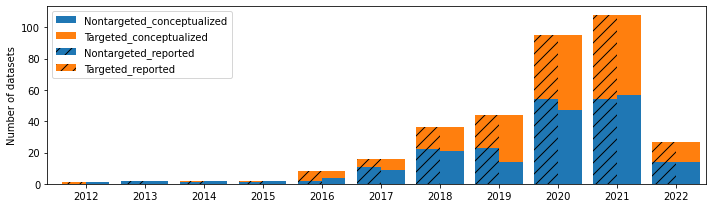

In [67]:
#with vs without target (堆积图)
#colors = ["#14517C","#E7EFFA","#2F7FC1"]
colors=["#2878B5","#999999","#9AC9DB"]

fig, ax = plt.subplots()

p = dh_1.pivot_table(index=["year"], columns=['re'], values='Language', aggfunc='count')
p.plot(kind='bar', stacked=True, width=0.4, ax=ax, color=sns.color_palette(), figsize=(7,3), position=0)#.legend(["Nontargeted_conceptualized","Targeted_conceptualized"])
t = dh_1.pivot_table(index=["year"], columns=['recode'],values='Language', aggfunc='count')
t.plot(kind='bar', stacked=True, width=0.4, ax=ax, color=sns.color_palette(), figsize=(10,3), position=1, hatch='//')
ax.set_xlim(right=len(p)-0.5)
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Number of datasets')
#plt.show()
#p.plot(kind='bar', stacked=True, figsize=(10,3), color = sns.color_palette())
plt.legend(["Nontargeted_conceptualized","Targeted_conceptualized","Nontargeted_reported","Targeted_reported"])
plt.tight_layout()
plt.savefig("compare_targets.pdf")

In [68]:
def to_value(target):
    if target == "General":
        return -1
    else:
        return 1

dh_1['Explicit'] = dh_1['General or specific'].apply(to_value)
dh_1['Explicit'].head()

0    1
1    1
2    1
3   -1
4   -1
Name: Explicit, dtype: int64

In [69]:
def to_values(target):
    if target == "Non-targeted":
        return -1
    else:
        return 1

dh_1['Implicit'] = dh_1['Targeted or non-targeted'].apply(to_values)
dh_1['Implicit'].head()

0   -1
1    1
2    1
3   -1
4   -1
Name: Implicit, dtype: int64

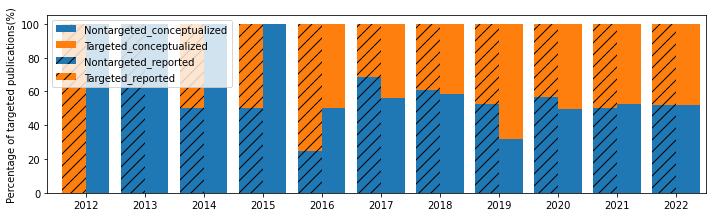

In [70]:
# Proportion figure
import numpy as np

fig, ax = plt.subplots()

#calculate the percentage
#per = (dh_1.groupby(['year'])['Implicit'].size() / dh_1.groupby(['year','Implicit']).count()).mul(100).round(1).unstack(level=1)
#per = dh_1.groupby(['year'])['Implicit'].value_counts(normalize=True).mul(100).round(1).unstack(level=1)
per = pd.crosstab(dh_1.year, dh_1.Explicit, normalize='index').mul(100).round(1)
imt = pd.crosstab(dh_1.year, dh_1.Implicit, normalize='index').mul(100).round(1)

#dh_1.pivot_table(index=["year"], columns=['recode'],values='Language', aggfunc='count')
#t.plot(kind='bar', stacked=True, width=0.4, ax=ax, color=sns.color_palette(), figsize=(10,3), position=1, hatch='//')#.legend(["Both_explicit","Non-targeted_explicit","Targeted_explicit"])

#plot
imtper = imt.plot(kind='bar', stacked=True, rot=0, figsize=(10, 3), width=0.4, ax=ax, position=0)#.legend(["Non-targeted","Targeted"])
perper = per.plot(kind='bar', stacked=True, rot=0, figsize=(10, 3), width=0.4, ax=ax, position=1, hatch='//')#.legend(["Non-targeted","Targeted"])


ax.set_xlim(right=len(p)-0.5)

plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.ylabel("Percentage of targeted publications(%)")

plt.legend(["Nontargeted_conceptualized","Targeted_conceptualized","Nontargeted_reported","Targeted_reported"])
plt.tight_layout()
plt.savefig("ImpExp_percent.pdf")

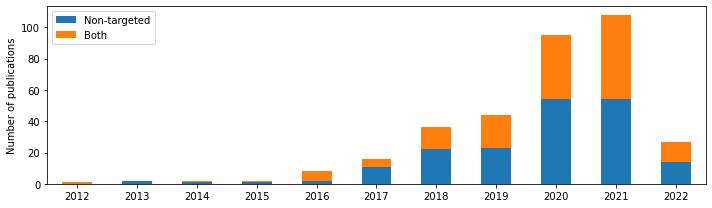

In [71]:
#with vs without target (堆积图)
#colors = ["#14517C","#E7EFFA","#2F7FC1"]
colors=["#2878B5","#999999","#9AC9DB"]

p = dh_1.pivot_table(index=["year"], columns='General or specific',values='citations', aggfunc='count')
p.plot(kind='bar', stacked=True, color=sns.color_palette(), figsize=(10,3)).legend(["Non-targeted","Both","Targeted"])
#plt.xlabel('Year')
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Number of publications')
#plt.show()
#p.plot(kind='bar', stacked=True, figsize=(10,3), color = sns.color_palette()).legend(["Non-targeted","Both","Targeted"])
plt.tight_layout()
plt.savefig("year_targets.pdf")

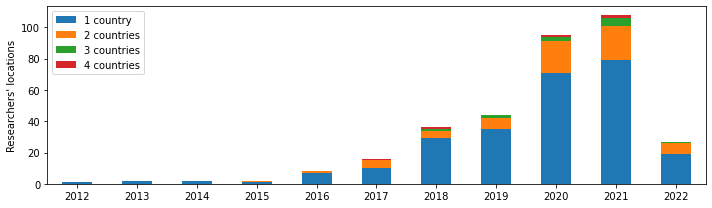

In [72]:
# International collaboration
pp = dh_1.pivot_table(index=["year"], columns='rl',values='Language', aggfunc='count')
pp.plot(kind='bar', stacked=True, color=sns.color_palette(), figsize=(10,3)).legend(["1 country","2 countries","3 countries","4 countries","5 countries"])
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.ylabel("Researchers' locations")

plt.tight_layout()
plt.savefig("Collab_year.pdf")


In [73]:
dh_1['Targetedornon'] = dh_1['Targeted or non-targeted'].str.count(",") + 1
dh_1['Targetedornon'].mean()

1.0

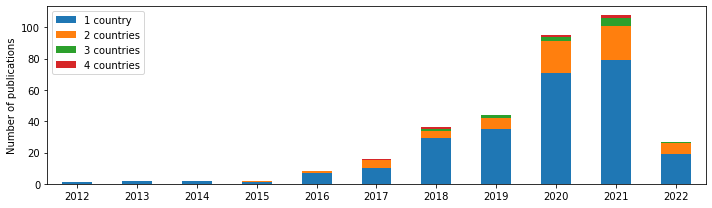

In [74]:
# International collaboration
pp = dh_1.pivot_table(index=["year"], columns='rl',values='Language', aggfunc='count')
pp.plot(kind='bar', stacked=True, color=sns.color_palette(), figsize=(10,3)).legend(["1 country","2 countries","3 countries","4 countries","5 countries"])
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.ylabel("Number of publications")

plt.tight_layout()
plt.savefig("Collab_year.pdf")


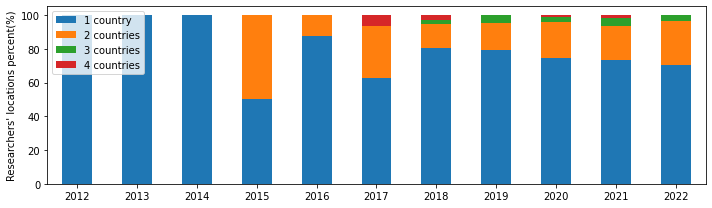

In [75]:
# Proportion figure
import numpy as np

#calculate the percentage
perc = (dh_1.groupby(['year'])['rl'].size() / dh_1.groupby(['year','rl']).count()).mul(100).round(1).unstack(level=1)

perc = dh_1.groupby(['year'])['rl'].value_counts(normalize=True).mul(100).round(1).unstack(level=1)
perc = pd.crosstab(dh_1.year, dh_1.rl, normalize='index').mul(100).round(1)

#plot
ax = perc.plot(kind='bar', ylabel="Researchers' locations percent(%)", stacked=True, rot=0, figsize=(10, 3)).legend(["1 country","2 countries","3 countries","4 countries"])


plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.ylabel("Researchers' locations percent(%)")

plt.tight_layout()
plt.savefig("Collab_percent.pdf")

In [76]:
dh_1.groupby(['year','rl']).size()

year  rl
2012  1      1
2013  1      2
2014  1      2
2015  1      1
      2      1
2016  1      7
      2      1
2017  1     10
      2      5
      4      1
2018  1     29
      2      5
      3      1
      4      1
2019  1     35
      2      7
      3      2
2020  1     71
      2     20
      3      3
      4      1
2021  1     79
      2     22
      3      5
      4      2
2022  1     19
      2      7
      3      1
dtype: int64

In [77]:
d1=dh_1.groupby('year')['rl'].mean()
d1

year
2012    1.000000
2013    1.000000
2014    1.000000
2015    1.500000
2016    1.125000
2017    1.500000
2018    1.277778
2019    1.250000
2020    1.305263
2021    1.351852
2022    1.333333
Name: rl, dtype: float64

In [78]:
rlcount#.count()59

Researcher location
USA                     94
India                   46
UK                      39
Germany                 18
Italy                   16
France                  13
Saudi Arabia            12
Spain                   12
Qatar                   12
Bangladesh              12
Indonesia               11
Canada                  11
Ireland                 10
Russia                  10
Pakistan                 9
China                    8
Turkey                   7
Greece                   7
Mexico                   7
South Korea              6
Australia                6
Brazil                   5
Finland                  5
Netherlands              4
Denmark                  4
Belgium                  4
Jordan                   3
Malaysia                 3
Hong Kong SAR            3
Egypt                    3
Sweden                   3
Tunisia                  3
Ecuador                  2
Ethiopia                 2
Vietnam                  2
Bulgaria                 2
Chile   

In [79]:
source_count[160:]

Data source
GamePressure             1
news portals             1
online shopping sites    1
Naver Movie review       1
dcinside.                1
Urban Dictionary         1
Name: count, dtype: int64

In [80]:
dh_1['format of dataset'].value_counts()

format of dataset
Github     111
Other       42
Website     27
Name: count, dtype: int64

In [83]:
#dh_1['format of dataset_3_TEXT'].value_counts()

visualization locations using world map

In [92]:
# visualization using world map

dh_1['Researcher location']

0      Saudi Arabia
1               USA
2               USA
3               USA
4         Australia
           ...     
336             USA
337      India, USA
338             USA
339         Denmark
340      USA, Qatar
Name: Researcher location, Length: 341, dtype: object

In [93]:
dh_1['year']

0      2021
1      2019
2      2020
3      2020
4      2021
       ... 
336    2019
337    2018
338    2021
339    2016
340    2017
Name: year, Length: 341, dtype: object

In [611]:
#split the list of location

RL=hacom_1['Researcher location']

location = [x for xs in RL for x in xs.split(', ')]
#location

In [773]:
rlcount.to_csv('researchlocation.csv') 
rlc = pd.read_csv("researchlocation.csv")
rlc = rlc.rename(columns={"count": "Number of publications"})
rlc.head()

,Researcher location,Number of publications
0,USA,94
1,India,46
2,UK,39
3,Germany,18
4,Italy,16


In [813]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append(country)
    return CODE

# create a column for code 
rlc['CODE']=alpha3code(rlc['Researcher location'])
rlc['Researcher location']=rlc['Researcher location'].replace(['Saudi\xa0Arabia'],'Saudi Arabia')
rlc['CODE'] = rlc['CODE'].replace(['UK', 'Saudi Arabia', 'Russia', 'South Korea', 'Vietnam', 'Taiwan', 'Hong Kong SAR'],['GBR','SAU','RUS','KOR','VNM','TWN','HKG'])
#rlc['CODE'] = rlc['CODE'].replace(['Saudi Arabia'],'SA')

rlc.head()

#('SA', 'Saudi Arabia')
#('RU', 'Russian Federation')
#('KR', 'Korea (South)')
#('VN', 'Viet Nam')
#('TW', 'Taiwan')
#('HK', 'Hong Kong')

,Researcher location,Number of publications,counts,CODE
0,USA,94,115416.284238,USA
1,India,46,174004.969652,IND
2,UK,39,126331.501519,GBR
3,Germany,18,153373.939338,DEU
4,Italy,16,101457.496249,ITA


In [814]:
rlc[:10]

,Researcher location,Number of publications,counts,CODE
0,USA,94,115416.284238,USA
1,India,46,174004.969652,IND
2,UK,39,126331.501519,GBR
3,Germany,18,153373.939338,DEU
4,Italy,16,101457.496249,ITA
5,France,13,191874.700810,FRA
6,Saudi Arabia,12,190071.485412,SAU
7,Spain,12,103342.142763,ESP
8,Qatar,12,195694.933628,QAT
9,Bangladesh,12,113720.932136,BGD


In [815]:
import pandas as pd
import numpy as np
import io

#country = pd.read_csv(io.StringIO(data), delim_whitespace=True)

import plotly.express as px

np.random.seed(12)
gapminder = rlc
gapminder['counts'] = np.random.uniform(low=100000, high=200000, size=len(gapminder)).tolist()

fig = px.choropleth(gapminder, locations="CODE",
                    locationmode='ISO-3',
                    color="Number of publications",
                    hover_name="Researcher location",
                   color_continuous_scale=px.colors.sequential.Bluyl)
                   #title="Number of publications")
                    #color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_traces(marker_line_color='white',marker_line_width=0.5)
fig.update_layout(geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
        coloraxis_colorbar_len=0.4,
        coloraxis_colorbar_thickness=15,
        #coloraxis_colorbar_bgcolor="white",
        coloraxis_colorbar_xanchor="left",
        coloraxis_colorbar_yanchor="middle",
        coloraxis_colorbar_x=0.02,
        coloraxis_colorbar_y=0.3,
        coloraxis_colorbar_tickfont_size=18)

fig.show()


fig.write_html(file='country_publication.html')


In [764]:
from collections import Counter

countries = hacom_1['Researcher location'].str.split(', ').values
# converting from paper level to dataset level
countries = [i * int(hacom_1['Number of new datasets'][n]) for n, i in enumerate(countries)]
country_list = [item for sublist in countries for item in sublist]
countries_df = pd.DataFrame(Counter(country_list).most_common(40))
countries_df.columns = ['Researcher location', 'Number of Datasets']
#countries_df = countries_df.set_index('Researcher location')

In [765]:
countries_df[:5]

,Researcher location,Number of Datasets
0,USA,135
1,India,57
2,UK,57
3,Germany,32
4,Italy,32


In [775]:
import pycountry 
def alpha3codee(column):
    CODEE=[]
    for country in column:
        try:
            codee=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODEE.append(codee)
        except:
            CODEE.append(country)
    return CODEE

# create a column for code 
countries_df['CODEE']=alpha3codee(countries_df['Researcher location'])
countries_df['Researcher location']=countries_df['Researcher location'].replace(['Saudi\xa0Arabia'],'Saudi Arabia')
countries_df['CODEE'] = countries_df['CODEE'].replace(['UK', 'Saudi Arabia', 'Russia', 'South Korea', 'Vietnam', 'Taiwan', 'Hong Kong SAR'],['GBR','SAU','RUS','KOR','VNM','TWN','HKG'])
#rlc['CODE'] = rlc['CODE'].replace(['Saudi Arabia'],'SA')

countries_df.head()

,Researcher location,Number of Datasets,CODEE,CODE
0,USA,135,USA,USA
1,India,57,IND,IND
2,UK,57,GBR,GBR
3,Germany,32,DEU,DEU
4,Italy,32,ITA,ITA


In [797]:
np.random.seed(12)
gapminderr = countries_df
gapminderr['counts'] = np.random.uniform(low=100000, high=200000, size=len(gapminderr)).tolist()

fig = px.choropleth(gapminderr, locations="CODEE",
                    locationmode='ISO-3',
                    color="Number of Datasets",
                    hover_name="Researcher location",
                   color_continuous_scale=px.colors.sequential.Bluyl)
                   #title="Number of publications")
                    #color_continuous_scale=px.colors.sequential.Viridis_r)
fig.update_traces(marker_line_color='white',marker_line_width=0.5)
fig.update_layout(geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'),
        coloraxis_colorbar_len=0.4,
        coloraxis_colorbar_thickness=15,
        #coloraxis_colorbar_bgcolor="white",
        coloraxis_colorbar_xanchor="left",
        coloraxis_colorbar_yanchor="middle",
        coloraxis_colorbar_x=0.02,
        coloraxis_colorbar_y=0.3,
        coloraxis_colorbar_tickfont_size=30)

fig.show()


fig.write_html(file='country_publications.html')

Compare between single vs multiple platforms

In [630]:
dh_1['Data source'][50:55]

50      Twitter
51      YouTube
52      Twitter
53    Wikipedia
54      Twitter
Name: Data source, dtype: object

In [631]:
#Extract platforms from column 'Data source' 
platform = dh_1['Data source'].str.split(', ').explode().value_counts()
platform[:10] 

Data source
Twitter       186
YouTube        42
Facebook       42
Reddit         29
Wikipedia      17
Instagram      12
Gab             9
Stormfront      5
Weibo           3
Vkontakte       3
Name: count, dtype: int64

In [641]:
#Number of platforms data is from in the research
dh_1['platform_nr'] = dh_1['Data source'].str.count(",") + 1
dh_1['platform_nr'][50:55]

50    1.0
51    1.0
52    1.0
53    1.0
54    1.0
Name: platform_nr, dtype: float64

In [711]:
#Merge more than 2 sources into ≥2

def recode(source):
    if source >= 2:
        return "2+"
    else:
        return "1"

dh_1['Number of data sources'] = dh_1['platform_nr'].apply(recode)
dh_1['Number of data sources'].head()


0     1
1     1
2     1
3     1
4    2+
Name: Number of data sources, dtype: object

In [712]:
dh_1['Number of data sources'].value_counts() 

Number of data sources
1     253
2+     88
Name: count, dtype: int64

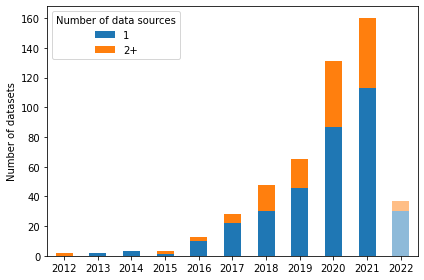

In [730]:
p = dh_1.pivot_table(index=dh_1['year'], columns='Number of data sources',values='Number of new datasets', aggfunc='sum')
bar = p.plot(kind='bar', stacked=True, color = sns.color_palette())#.legend(["Multiple sources","Single source"])
#plt.xlabel('Year')
plt.xlabel('') 
bar.get_children()[10].set_alpha(0.5)
bar.get_children()[21].set_alpha(0.5)
plt.xticks(rotation=0, ha='center')
#plt.yscale('log')
plt.ylabel('Number of datasets')
#plt.show()
plt.tight_layout()
plt.savefig("pubyear_sources.pdf", dpi = 400)

In [714]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

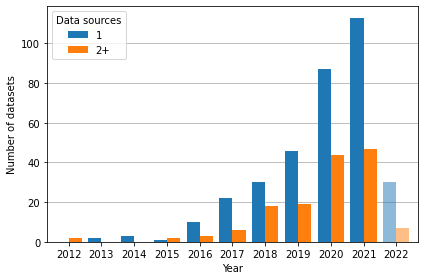

In [801]:
p = dh_1.pivot_table(index=dh_1['year'], columns='Number of data sources',values='Number of new datasets', aggfunc='sum')
baa = p.plot(kind='bar', width = 0.8, color = sns.color_palette())
baa.legend(title="Data sources")
plt.xlabel('Year')
#plt.xlabel('') 
baa.get_children()[10].set_alpha(0.5)
baa.get_children()[21].set_alpha(0.5)
plt.xticks(rotation=0, ha='center')
#plt.yscale('log')

ax, plt.ylabel('Number of datasets')
#plt.show()
baa.grid(axis='y')
baa.set(axisbelow=True)
plt.tight_layout()
plt.savefig("pubyear_sources_n.pdf", dpi = 400)